# Next Gen Stats - Passing Analysis

In [1]:
#Import your libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib as mpl
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
#Make prettier graphs
%config InlineBackend.figure_format = 'retina'

In [2]:
#Read in the data into a pandas dataframes
#Completion Probability Data
cp = pd.read_csv('CP_model_teams.csv')
#Pass Location Data
pass_locations = pd.read_csv('pass_and_game_data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Which team do you want to analyze?
team = 'KC'
#Offense or defense? For defense, put Offense=False
offense = True
cp.head(10)

,x_coord,y_coord,complete_prob_17,complete_prob_18,complete_prob_19,ARI_D_19,ARI_O_19,ATL_D_19,ATL_O_19,BAL_D_19,...,SF_D_19,SF_O_19,SEA_D_19,SEA_O_19,TB_D_19,TB_O_19,TEN_D_19,TEN_O_19,WAS_D_19,WAS_O_19
0,-30.00,-10.0,0.749790,0.768343,0.612009,0.996141,1.0,0.747035,1.0,1.0,...,0.000000,1.0,1.0,0.754613,0.500192,0.662501,1.0,1.0,0.700126,1.0
1,-29.75,-10.0,0.754694,0.771075,0.617868,0.995835,1.0,0.751701,1.0,1.0,...,0.000000,1.0,1.0,0.759878,0.509604,0.668505,1.0,1.0,0.701723,1.0
2,-29.50,-10.0,0.759599,0.773808,0.623728,0.995529,1.0,0.756367,1.0,1.0,...,0.000000,1.0,1.0,0.765144,0.519015,0.674509,1.0,1.0,0.703319,1.0
3,-29.25,-10.0,0.764504,0.776541,0.629587,0.995223,1.0,0.761033,1.0,1.0,...,0.000000,1.0,1.0,0.770409,0.528427,0.680513,1.0,1.0,0.704916,1.0
4,-29.00,-10.0,0.769409,0.779273,0.635447,0.994917,1.0,0.765699,1.0,1.0,...,0.000000,1.0,1.0,0.775675,0.537839,0.686517,1.0,1.0,0.706513,1.0
5,-28.75,-10.0,0.774313,0.782006,0.641306,0.994611,1.0,0.770365,1.0,1.0,...,0.000000,1.0,1.0,0.780940,0.547250,0.692521,1.0,1.0,0.708109,1.0
6,-28.50,-10.0,0.779218,0.784739,0.647166,0.994305,1.0,0.775031,1.0,1.0,...,0.000000,1.0,1.0,0.786205,0.556662,0.698525,1.0,1.0,0.709706,1.0
7,-28.25,-10.0,0.784123,0.787472,0.653025,0.993999,1.0,0.779697,1.0,1.0,...,0.000000,1.0,1.0,0.791471,0.566074,0.704529,1.0,1.0,0.711303,1.0
8,-28.00,-10.0,0.789027,0.790204,0.658885,0.993693,1.0,0.784363,1.0,1.0,...,0.018115,1.0,1.0,0.796736,0.575485,0.710533,1.0,1.0,0.712899,1.0
9,-27.75,-10.0,0.793926,0.792934,0.664742,0.993387,1.0,0.789029,1.0,1.0,...,0.037375,1.0,1.0,0.802002,0.584897,0.716536,1.0,1.0,0.714496,1.0


In [5]:
xmin = cp['x_coord'].min()
xmax = cp['x_coord'].max()
ymin = cp['y_coord'].min()
ymax = cp['y_coord'].max()

In [6]:
#Get relevant data
nfl_19_matrix = cp.pivot("x_coord", "y_coord", "complete_prob_19")
if offense:
    team_column = team + '_O_19'
    team_completions = pass_locations.loc[(pass_locations['team']==team) &
                                      ((pass_locations['pass_type']=='COMPLETE') |
                                       (pass_locations['pass_type']=='TOUCHDOWN')) &
                                     (pass_locations['season']==2019)][['x_coord','y_coord']]
    team_incompletions = pass_locations.loc[(pass_locations['team']==team) &
                                      ((pass_locations['pass_type']=='INCOMPLETE') |
                                       (pass_locations['pass_type']=='INTERCEPTION')) &
                                     (pass_locations['season']==2019)][['x_coord','y_coord']]
else:
    team_column = team + '_D_19'
    team_completions = pass_locations.loc[(pass_locations['defteam']==team) &
                                      ((pass_locations['pass_type']=='COMPLETE') |
                                       (pass_locations['pass_type']=='TOUCHDOWN')) &
                                     (pass_locations['season']==2019)][['x_coord','y_coord']]
    team_incompletions = pass_locations.loc[(pass_locations['defteam']==team) &
                                      ((pass_locations['pass_type']=='INCOMPLETE') |
                                       (pass_locations['pass_type']=='INTERCEPTION')) &
                                     (pass_locations['season']==2019)][['x_coord','y_coord']]
team_matrix = cp.pivot("x_coord", "y_coord", team_column)
team_cpoe = team_matrix - nfl_19_matrix




In [8]:
#Create colormap - using @stat_ron's suggested colormap
top = cm.get_cmap('Blues_r', 128)
bottom = cm.get_cmap('Oranges', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
ron_yurko = ListedColormap(newcolors, name='OrangeBlue')

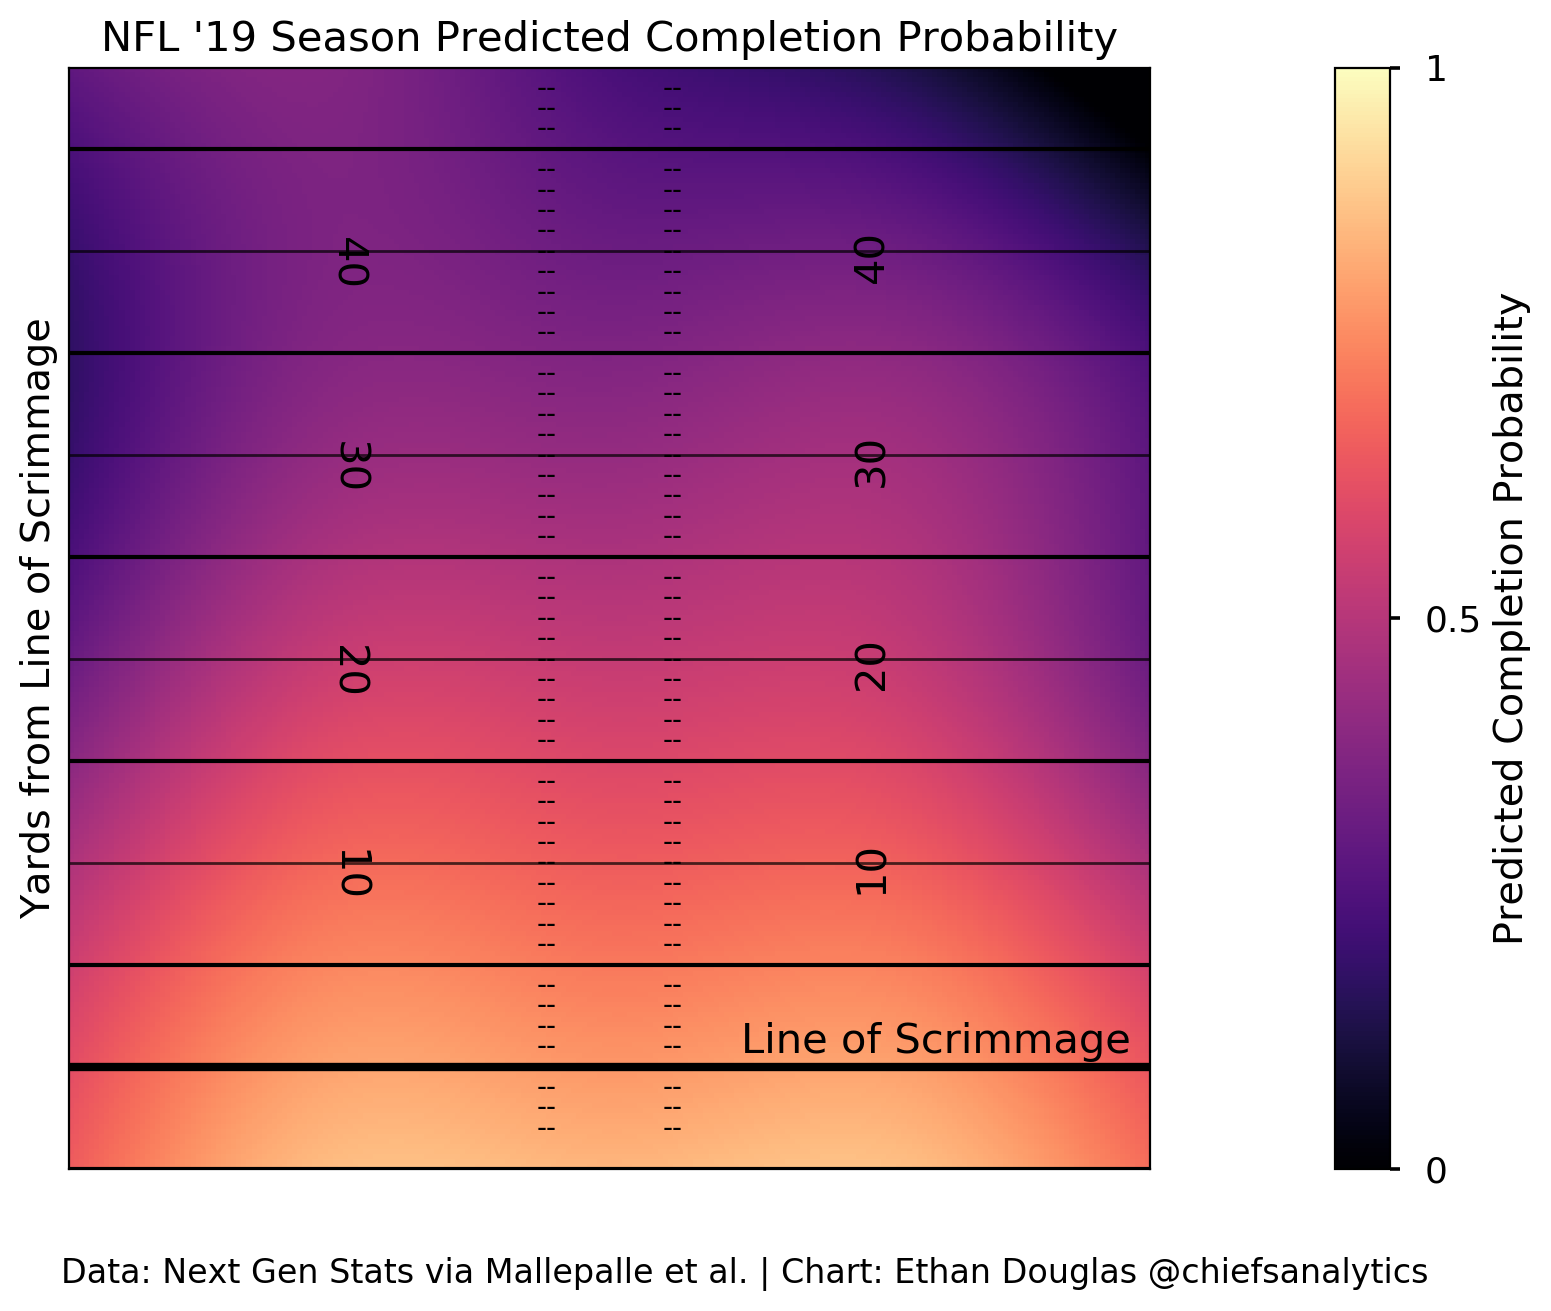

In [15]:
#Using my favorite plotting style, seaborn-talk
plt.style.use('default')
plt.style.use('seaborn-talk')


plt.imshow(np.fliplr(np.rot90(nfl_19_matrix,3)),
           origin='lower', aspect='auto',
           extent=[xmin, xmax, ymin, ymax],
           cmap='magma',
           norm = mpl.colors.Normalize(vmin=0, vmax=1))


#Set the plotting boundaries - restrict these to not be too deep, since our sample size is small there
xmin2 = -53/2
xmax2 = -1*xmin2
ymin2 = -5
ymax2 = 49
cbar = plt.colorbar()
cbar.set_label("Predicted Completion Probability")
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '0.5', '1'])
plt.axis('scaled')
plt.xlim([xmin2,xmax2])
plt.ylim([ymin2, ymax2])
plt.ylabel('Yards from Line of Scrimmage')


plt.xticks([])
plt.yticks([])
#Annotations
plt.axhline(0,c='k',ls='-',alpha=1,lw=3)
# plt.axvline(26.666, c='k', lw=3, alpha=1)
# plt.axvline(-26.666, c='k', lw=3, alpha=1)
for j in range(ymin2,ymax2-1,1):
    plt.annotate('--', (-3.1,j-0.1),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',fontsize =10)
    plt.annotate('--', (3.1,j-0.1),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',fontsize =10)
    
for i in range(-ymin2,ymax2,5):
    plt.axhline(i,c='k',ls='-',alpha=0.7, lw=1)
    
for i in range(ymin2,ymax2,10):
    plt.axhline(i,c='k',ls='-',alpha=1, lw=1.5)
    
for i in range(10,ymax2-1,10):
    plt.annotate(str(i), (-12.88,i-1.5),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',fontsize =15,
                rotation=270)
    plt.annotate(str(i), (12.88,i-1.15),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',fontsize =15,
                rotation=90)
 
plt.annotate('Line of Scrimmage', (16,0),
             textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center',fontsize = 15) # horizontal alignment can be left, right or center
#Final touches
plt.title('NFL \'19 Season Predicted Completion Probability',fontsize=15)
txt="Data: Next Gen Stats via Mallepalle et al. | Chart: Ethan Douglas @chiefsanalytics"
plt.figtext(0.5, 0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

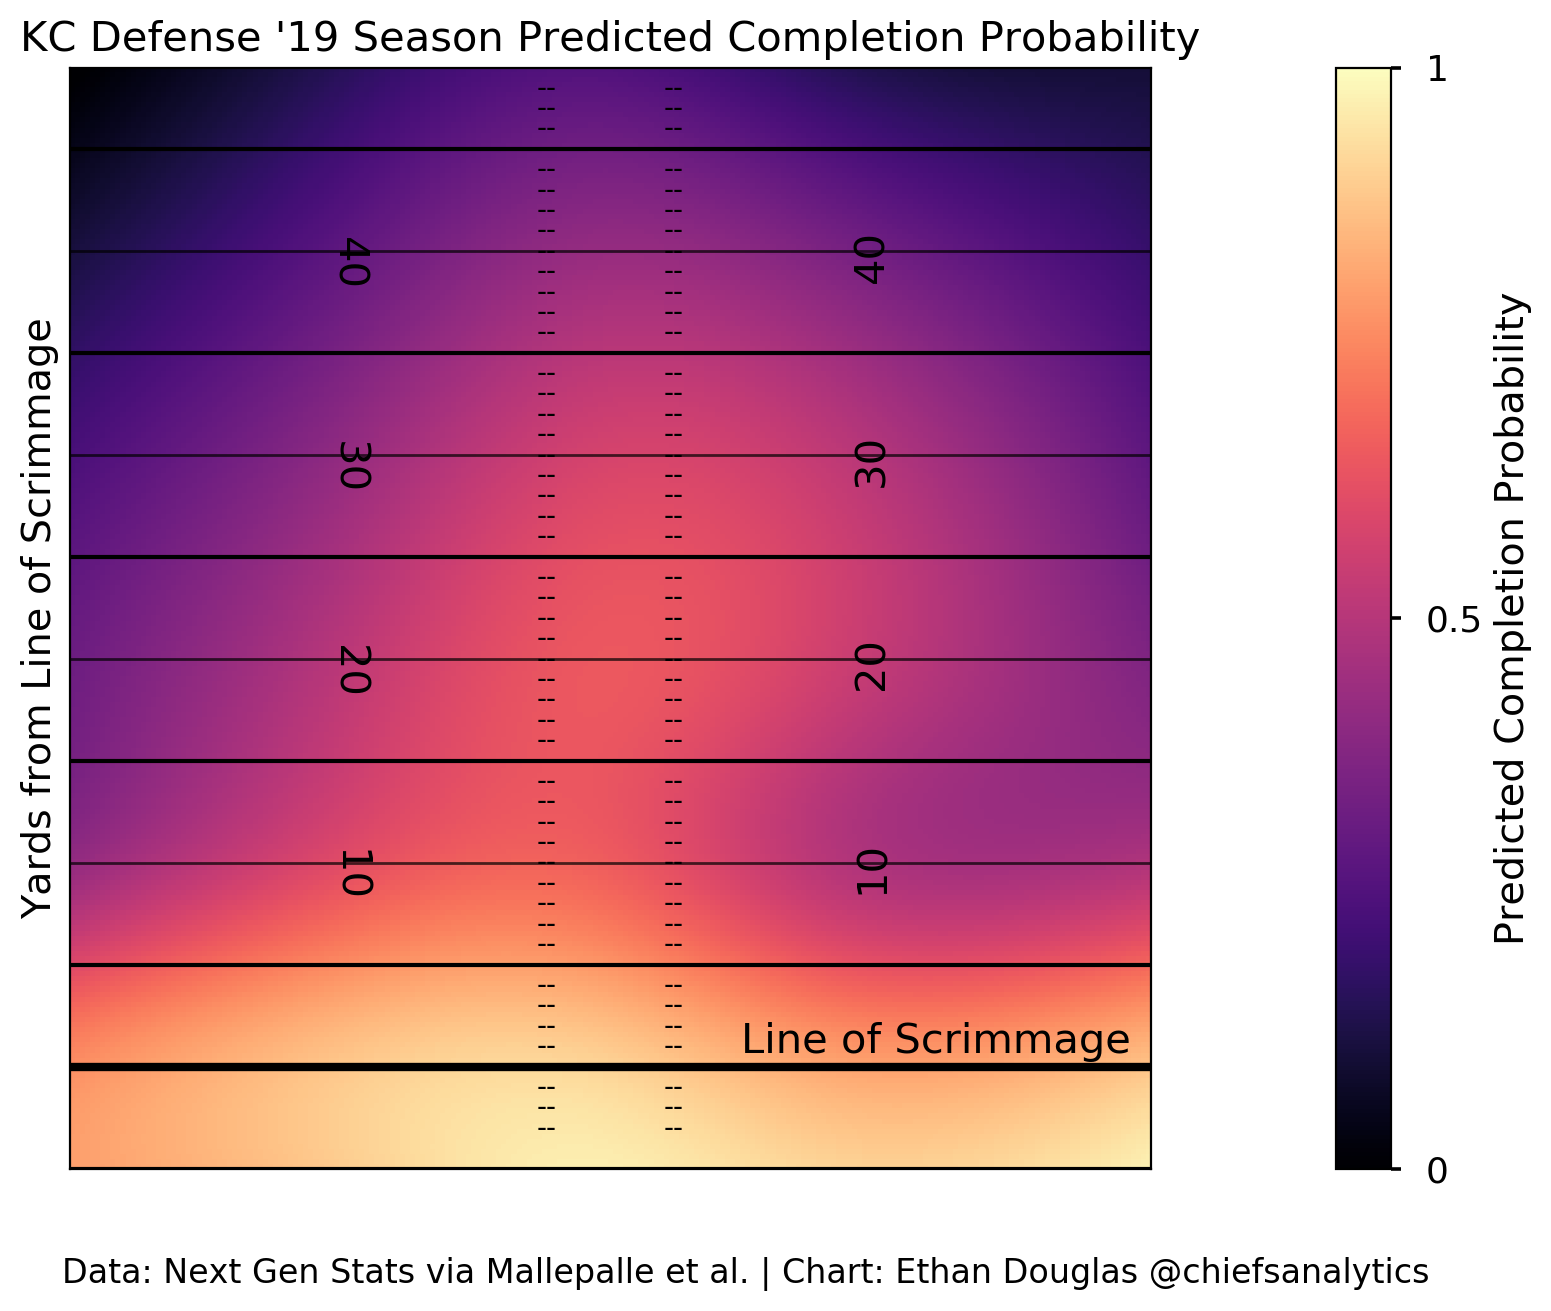

In [23]:
# Plot the result as an image
plt.imshow(np.fliplr(np.rot90(team_matrix,3)),
           origin='lower', aspect='auto',
           extent=[xmin, xmax, ymin, ymax],
           cmap='magma',
           norm = mpl.colors.Normalize(vmin=0, vmax=1))

cbar = plt.colorbar()
cbar.set_label("Predicted Completion Probability")
cbar.set_ticks([0, 0.5, 1])
cbar.set_ticklabels(['0', '0.5', '1'])
plt.axis('scaled')
plt.xlim([xmin2,xmax2])
plt.ylim([ymin2, ymax2])
plt.ylabel('Yards from Line of Scrimmage')
# xmin = -53/2
# xmax = -1*xmin
# ymin = -5
# ymax = 55

plt.xticks([])
plt.yticks([])
#Annotations
plt.axhline(0,c='k',ls='-',alpha=1,lw=3)
# plt.axvline(26.666, c='k', lw=3, alpha=1)
# plt.axvline(-26.666, c='k', lw=3, alpha=1)
for j in range(ymin2,ymax2-1,1):
    plt.annotate('--', (-3.1,j-0.1),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',fontsize =10)
    plt.annotate('--', (3.1,j-0.1),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',fontsize =10)
    
for i in range(-ymin2,ymax2,5):
    plt.axhline(i,c='k',ls='-',alpha=0.7, lw=1)
    
for i in range(ymin2,ymax2,10):
    plt.axhline(i,c='k',ls='-',alpha=1, lw=1.5)
    
for i in range(10,ymax2-1,10):
    plt.annotate(str(i), (-12.88,i-1.5),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',fontsize =15,
                rotation=270)
    plt.annotate(str(i), (12.88,i-1.15),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',fontsize =15,
                rotation=90)

plt.annotate('Line of Scrimmage', (16,0),
             textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center',fontsize = 15) # horizontal alignment can be left, right or center
#Final touches
title = team + ' Defense \'19 Season Predicted Completion Probability'
plt.title(title,fontsize=15)
plt.xlim(xmin2,xmax2)
plt.ylim(ymin2,ymax2)
txt="Data: Next Gen Stats via Mallepalle et al. | Chart: Ethan Douglas @chiefsanalytics"
plt.figtext(0.5, 0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

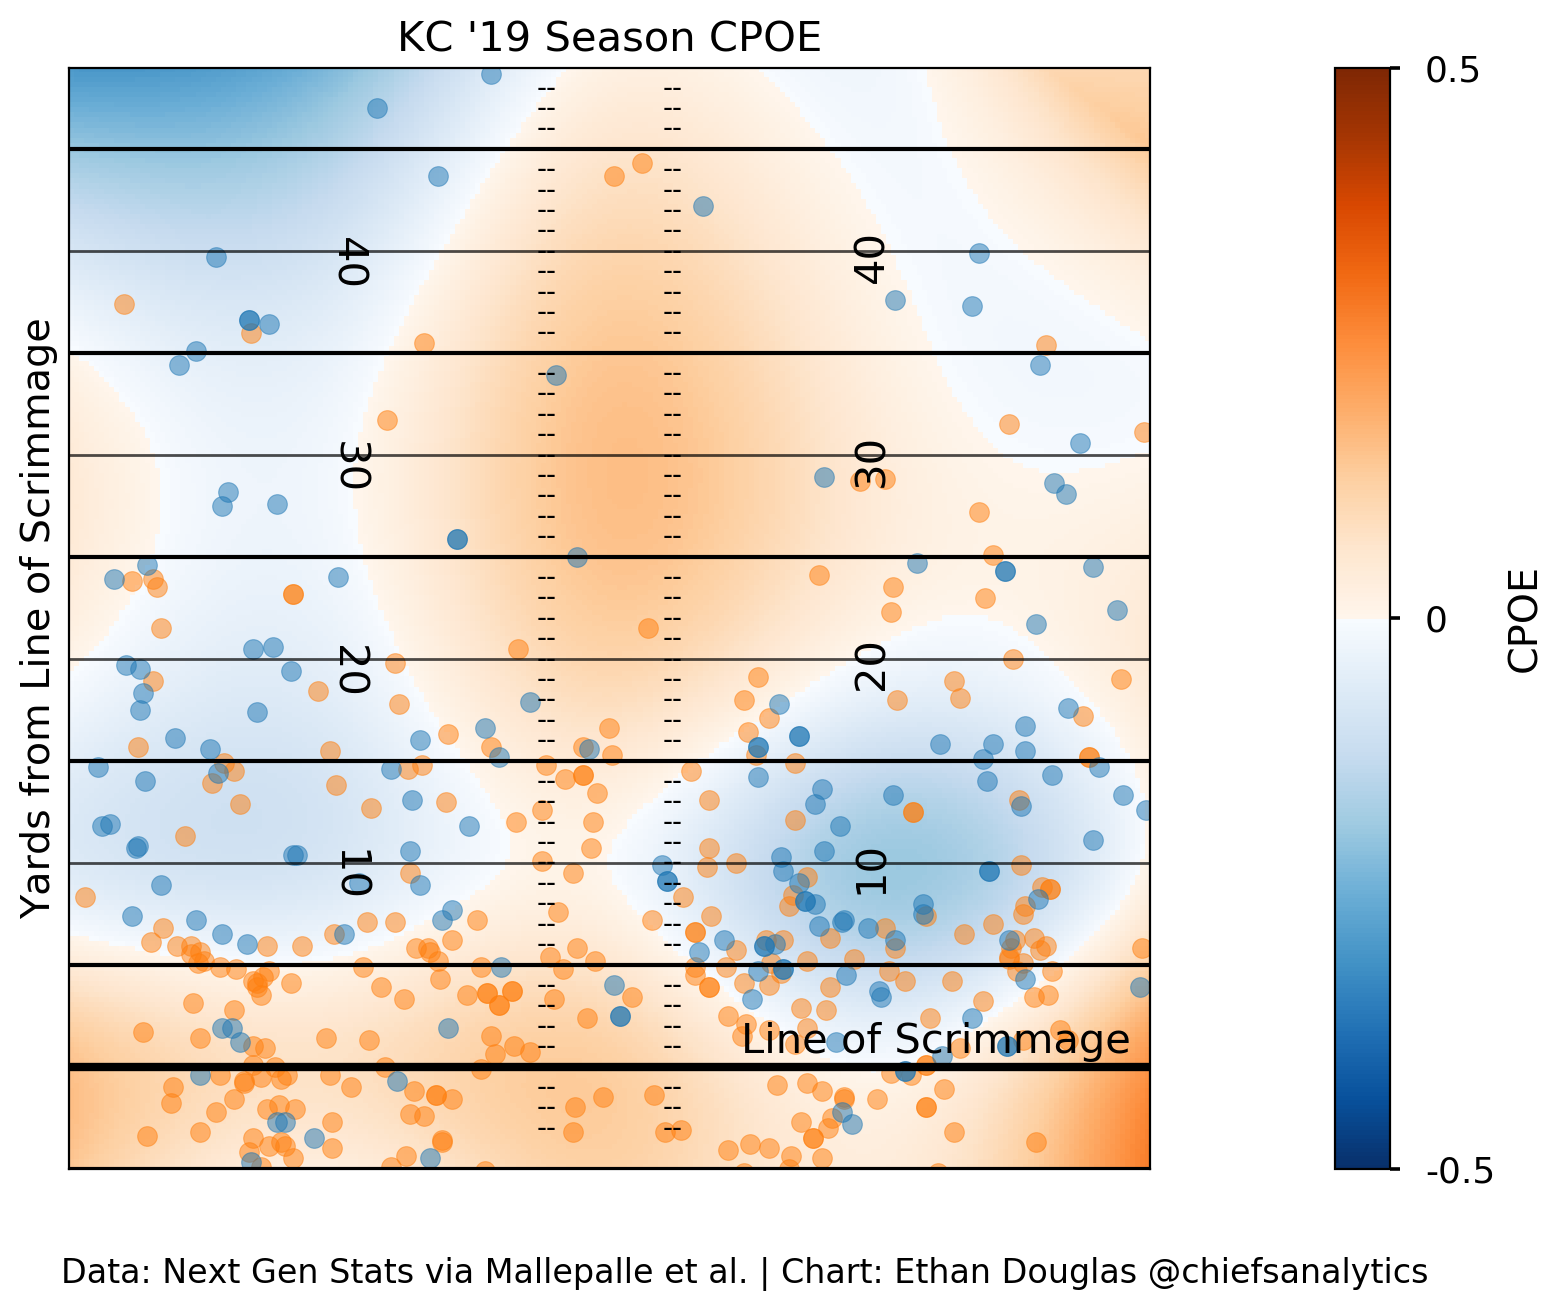

In [22]:
# Plot the result as an image
plt.imshow(np.fliplr(np.rot90(team_cpoe,3)),
           origin='lower', aspect='auto',
           extent=[xmin, xmax, ymin, ymax],
           cmap=ron_yurko,
           norm = mpl.colors.Normalize(vmin=-0.5, vmax=0.5))


cbar = plt.colorbar()
cbar.set_label("CPAE")
cbar.set_ticks([-.5, 0, 0.5])
cbar.set_ticklabels(['-0.5', '0', '0.5'])
plt.axis('scaled')
plt.xlim([xmin2,xmax2])
plt.ylim([ymin2, ymax2])
plt.ylabel('Yards from Line of Scrimmage')

#Scatter to overlay
plt.scatter(team_completions['x_coord'],team_completions['y_coord'], s=50, alpha=0.5, c='tab:orange', label= 'Opposing Completions')
plt.scatter(team_incompletions['x_coord'],team_incompletions['y_coord'], s=50, alpha=0.5, c='tab:blue', label='Opposing Incompletions')

plt.xticks([])
plt.yticks([])
#Annotations
plt.axhline(0,c='k',ls='-',alpha=1,lw=3)
# plt.axvline(26.666, c='k', lw=3, alpha=1)
# plt.axvline(-26.666, c='k', lw=3, alpha=1)
for j in range(ymin2,ymax2-1,1):
    plt.annotate('--', (-3.1,j-0.1),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',fontsize =10)
    plt.annotate('--', (3.1,j-0.1),
                 textcoords="offset points",
                 xytext=(0,5),
                 ha='center',fontsize =10)
    
for i in range(-ymin2,ymax2,5):
    plt.axhline(i,c='k',ls='-',alpha=0.7, lw=1)
    
for i in range(ymin2,ymax2,10):
    plt.axhline(i,c='k',ls='-',alpha=1, lw=1.5)
    
for i in range(10,ymax2-1,10):
    plt.annotate(str(i), (-12.88,i-1.5),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',fontsize =15,
                rotation=270)
    plt.annotate(str(i), (12.88,i-1.15),
            textcoords="offset points",
            xytext=(0,5),
            ha='center',fontsize =15,
                rotation=90)

# plt.annotate('Out of Bounds', (25,30),
#              textcoords="offset points", # how to position the text
#                  xytext=(0,5), # distance from text to points (x,y)
#                  ha='center',fontsize = 15,
#             rotation=90) # horizontal alignment can be left, right or center    
plt.annotate('Line of Scrimmage', (16,0),
             textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center',fontsize = 15) # horizontal alignment can be left, right or center
#Final touches
title = team + ' \'19 Season CPOE'
plt.title(title,fontsize=15)
txt="Data: Next Gen Stats via Mallepalle et al. | Chart: Ethan Douglas @chiefsanalytics"
plt.figtext(0.5, 0.03, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()